#### Question: What are the best predictors of Churn Value?

##### Expectations:
the expectation would be to identify the factors or variables in the dataset that have a strong correlation or influence on the churn value. These predictors could be demographic information, customer behavior, service usage, or any other relevant data points available in the dataset. The project would aim to analyze and determine which factors are most significant in predicting customer churn.

By understanding the factors that contribute to customer churn, the company can develop targeted strategies to address those specific issues. This may involve improving service quality, addressing customer concerns, offering personalized promotions or discounts, or enhancing the overall customer experience.

#### EDA:

In [1]:
# Importing the libraries
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from imblearn.over_sampling import ADASYN, BorderlineSMOTE
from collections import Counter

In [2]:
# Load the first dataset from ../Dataset/Telco_customer_churn_services.xlsx
services = pd.read_excel('../Dataset/Telco_customer_churn_services.xlsx')

In [3]:
# Load the second dataset from ../Dataset/Telco_customer_churn.xlsx
compound = pd.read_excel('../Dataset/Telco_customer_churn.xlsx')

In [4]:
# Load the data from /Dataset/Telco_customer_churn_demographics.xlsx
demographics = pd.read_excel(
    '../Dataset/Telco_customer_churn_demographics.xlsx')

In [5]:
# rename the column to match the column name in the dataset
compound.rename(columns={'CustomerID': 'Customer ID'}, inplace=True)

In [6]:
# Join the two datasets on the column 'Customer ID'
dataset1 = pd.merge(demographics, compound, on='Customer ID')

In [7]:
dataset1.columns

Index(['Customer ID', 'Count_x', 'Gender_x', 'Age', 'Under 30',
       'Senior Citizen_x', 'Married', 'Dependents_x', 'Number of Dependents',
       'Count_y', 'Country', 'State', 'City', 'Zip Code', 'Lat Long',
       'Latitude', 'Longitude', 'Gender_y', 'Senior Citizen_y', 'Partner',
       'Dependents_y', 'Tenure Months', 'Phone Service', 'Multiple Lines',
       'Internet Service', 'Online Security', 'Online Backup',
       'Device Protection', 'Tech Support', 'Streaming TV', 'Streaming Movies',
       'Contract', 'Paperless Billing', 'Payment Method', 'Monthly Charges',
       'Total Charges', 'Churn Label', 'Churn Value', 'Churn Score', 'CLTV',
       'Churn Reason'],
      dtype='object')

In [8]:
my_columns = ['Gender_x', 'Age', 'Married',
              'Number of Dependents', 'Churn Value', 'Tenure Months', 'Churn Score', 'Monthly Charges', 'Customer ID', 'CLTV']

dataset1 = dataset1[my_columns]

In [9]:
dataset1.columns

Index(['Gender_x', 'Age', 'Married', 'Number of Dependents', 'Churn Value',
       'Tenure Months', 'Churn Score', 'Monthly Charges', 'Customer ID',
       'CLTV'],
      dtype='object')

In [10]:
dataset = pd.merge(services, dataset1, on='Customer ID')

In [11]:
dataset.columns

Index(['Customer ID', 'Count', 'Quarter', 'Referred a Friend',
       'Number of Referrals', 'Tenure in Months', 'Offer', 'Phone Service',
       'Avg Monthly Long Distance Charges', 'Multiple Lines',
       'Internet Service', 'Internet Type', 'Avg Monthly GB Download',
       'Online Security', 'Online Backup', 'Device Protection Plan',
       'Premium Tech Support', 'Streaming TV', 'Streaming Movies',
       'Streaming Music', 'Unlimited Data', 'Contract', 'Paperless Billing',
       'Payment Method', 'Monthly Charge', 'Total Charges', 'Total Refunds',
       'Total Extra Data Charges', 'Total Long Distance Charges',
       'Total Revenue', 'Gender_x', 'Age', 'Married', 'Number of Dependents',
       'Churn Value', 'Tenure Months', 'Churn Score', 'Monthly Charges',
       'CLTV'],
      dtype='object')

In [12]:
my_columns += ['Phone Service', 'Internet Service', 'Multiple Lines',
               'Online Security', 'Online Backup', 'Device Protection Plan', 'Premium Tech Support', 'Unlimited Data', 'Total Revenue', 'Referred a Friend']

dataset = dataset[my_columns]

In [13]:
# rename Gender_x to gender
dataset.rename(columns={'Gender_x' : 'Gender'},inplace=True)

In [14]:
dataset.dtypes

Gender                     object
Age                         int64
Married                    object
Number of Dependents        int64
Churn Value                 int64
Tenure Months               int64
Churn Score                 int64
Monthly Charges           float64
Customer ID                object
CLTV                        int64
Phone Service              object
Internet Service           object
Multiple Lines             object
Online Security            object
Online Backup              object
Device Protection Plan     object
Premium Tech Support       object
Unlimited Data             object
Total Revenue             float64
Referred a Friend          object
dtype: object

In [15]:
status = pd.read_excel('../Dataset/Telco_customer_churn_status.xlsx')

In [16]:
status.dtypes

Customer ID           object
Count                  int64
Quarter               object
Satisfaction Score     int64
Customer Status       object
Churn Label           object
Churn Value            int64
Churn Score            int64
CLTV                   int64
Churn Category        object
Churn Reason          object
dtype: object

In [17]:
columns = ['Customer ID', 'Satisfaction Score']
status1 = status[columns]

In [18]:
dataset = pd.merge(dataset, status1, on='Customer ID')

In [19]:
dataset.dtypes

Gender                     object
Age                         int64
Married                    object
Number of Dependents        int64
Churn Value                 int64
Tenure Months               int64
Churn Score                 int64
Monthly Charges           float64
Customer ID                object
CLTV                        int64
Phone Service              object
Internet Service           object
Multiple Lines             object
Online Security            object
Online Backup              object
Device Protection Plan     object
Premium Tech Support       object
Unlimited Data             object
Total Revenue             float64
Referred a Friend          object
Satisfaction Score          int64
dtype: object

In [20]:
Customer_ID = dataset['Customer ID']
if 'Customer ID' in dataset.columns:
    dataset.drop('Customer ID', axis=1, inplace=True)

In [21]:
dataset = pd.get_dummies(dataset,drop_first=True)

In [22]:
dataset.head()

,Age,Number of Dependents,Churn Value,Tenure Months,Churn Score,Monthly Charges,CLTV,Total Revenue,Satisfaction Score,Gender_Male,Married_Yes,Phone Service_Yes,Internet Service_Yes,Multiple Lines_Yes,Online Security_Yes,Online Backup_Yes,Device Protection Plan_Yes,Premium Tech Support_Yes,Unlimited Data_Yes,Referred a Friend_Yes
0,78,0,1,1,100,39.65,5433,59.65,3,1,0,0,1,0,0,0,1,0,0,0
1,74,1,1,8,69,80.65,5302,1024.10,3,0,1,1,1,1,0,1,0,0,1,1
2,71,3,1,18,81,95.45,3179,1910.88,2,1,0,1,1,1,0,0,0,0,1,0
3,78,1,1,25,88,98.50,5337,2995.07,2,0,1,1,1,0,0,1,1,0,1,1
4,80,1,1,37,67,76.50,2793,3102.36,2,0,1,1,1,1,0,0,0,0,1,1


In [23]:
if 'Married_Yes' in dataset.columns:
    dataset.rename(columns={'Married_Yes':'Married','Gender_Male': 'Gender','Phone Service_Yes':'Phone Service', 'Internet Service_Yes':'Internet Service', 'Multiple Lines_Yes':'Multiple Lines',
                        'Online Security_Yes':'Online Security', 'Online Backup_Yes':'Online Backup','Device Protection Plan_Yes':'Device Protection Plan',
                        'Premium Tech Support_Yes':'Premium Tech Support','Unlimited Data_Yes':'Unlimited Data','Referred a Friend_Yes':'Referred a Friend'}, inplace=True)

In [24]:
dataset.head()

,Age,Number of Dependents,Churn Value,Tenure Months,Churn Score,Monthly Charges,CLTV,Total Revenue,Satisfaction Score,Gender,Married,Phone Service,Internet Service,Multiple Lines,Online Security,Online Backup,Device Protection Plan,Premium Tech Support,Unlimited Data,Referred a Friend
0,78,0,1,1,100,39.65,5433,59.65,3,1,0,0,1,0,0,0,1,0,0,0
1,74,1,1,8,69,80.65,5302,1024.10,3,0,1,1,1,1,0,1,0,0,1,1
2,71,3,1,18,81,95.45,3179,1910.88,2,1,0,1,1,1,0,0,0,0,1,0
3,78,1,1,25,88,98.50,5337,2995.07,2,0,1,1,1,0,0,1,1,0,1,1
4,80,1,1,37,67,76.50,2793,3102.36,2,0,1,1,1,1,0,0,0,0,1,1


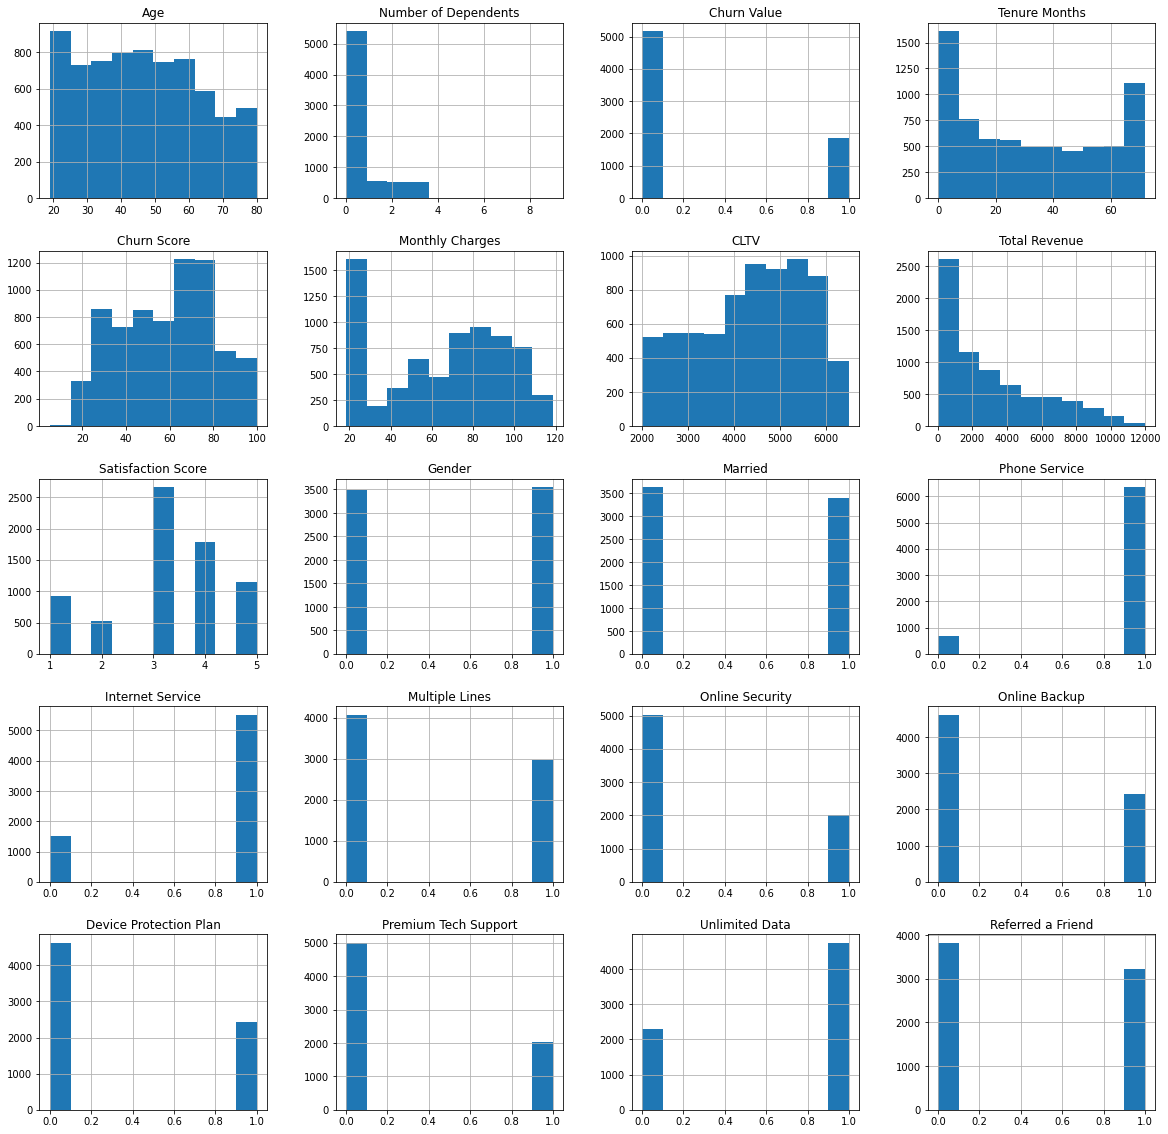

In [25]:
# visualoze the distribution of all the features
dataset.hist(figsize=(20, 20))
plt.show()

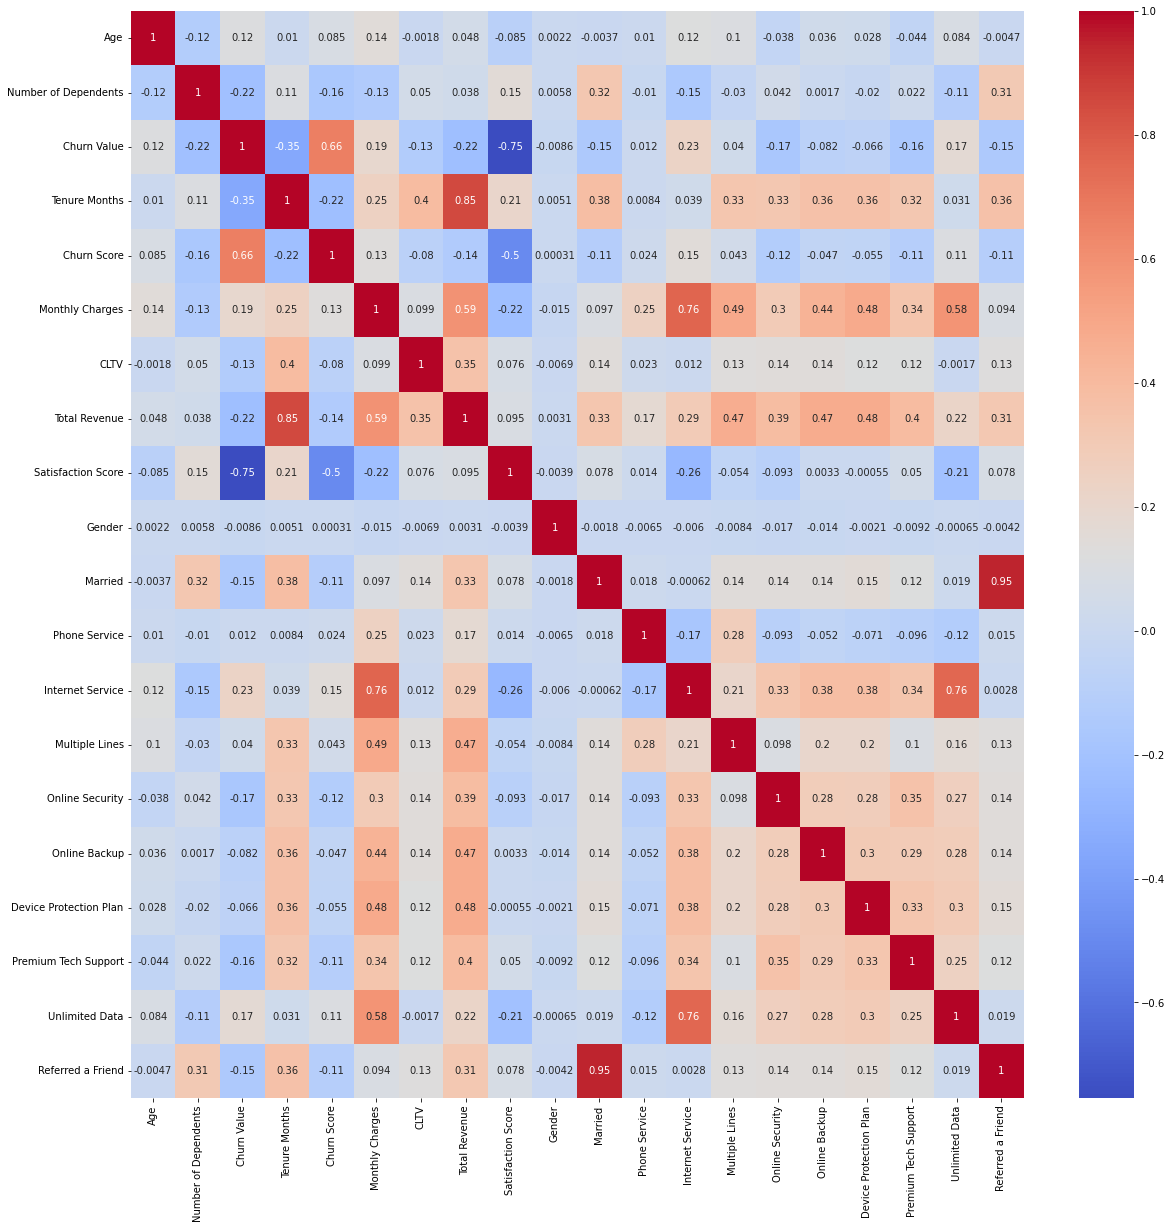

In [26]:
#visualize the correlation between the features
plt.figure(figsize=(20, 20))
sns.heatmap(dataset.corr(), annot=True, cmap='coolwarm')
plt.show()

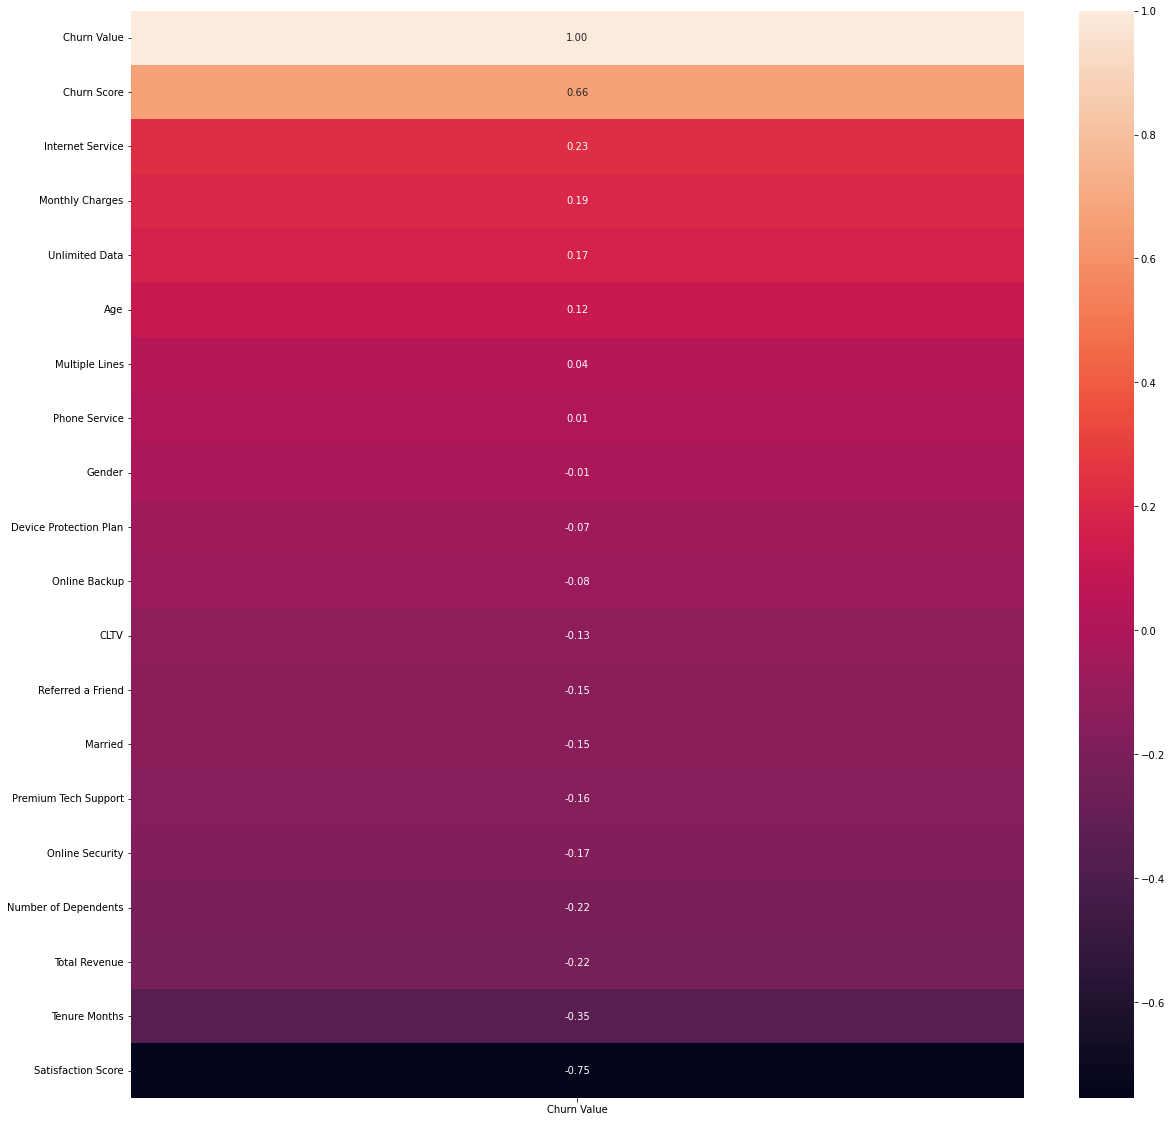

In [27]:
# visualize the correlation between the features and the target variable
plt.figure(figsize=(20, 20))
sns.heatmap(dataset.corr()[['Churn Value']].sort_values(
    by='Churn Value', ascending=False), annot=True, fmt='.2f')
plt.show()

##### Insights:
1. Churn Value is highly correlated with Churn Score. Which tells us that Churn Score is a good predictor of Churn Value.
2. Satisfaction Score is highly negatively correlated with Churn Value. Which tells us that Satisfaction Score is a very good predictor of Churn Value.
3. Some features such as Tenure Months will be taken into consideration for further analysis as it has a positive correlation with the Churn Value above `0.3`.

In [28]:
# get only the selected features
columns = ['Churn Value', 'Tenure Months', 'Churn Score', 'Satisfaction Score']
dataset = dataset[columns]

In [29]:
# Split the dataset into training and testing set
X = dataset.drop('Churn Value', axis=1)
y = dataset['Churn Value']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### Model Building:

##### Logistic Regression

In [30]:
# this function takes in the model, trains it and evaluates it on the test set
# it also uses SequentialFeatureSelector to select the best features for the model
def trainModel(model, X_train, y_train, X_test, y_test):

    # get features range
    feature_range = range(1, len(X_train.columns))

    best_model_accuracy = None
    best_accuracy = 0.0
    best_model_f1 = None
    best_f1 = 0.0
    best_features = None

    # loop through all the features
    for i in feature_range:
        sfs = SequentialFeatureSelector(
            model, n_features_to_select=i, direction='forward')

        # train the model using the training sets
        sfs.fit(X_train, y_train)

        # transform the data sets so that only the selected features are retained
        X_train_sfs = sfs.transform(X_train)
        X_test_sfs = sfs.transform(X_test)

        # Print the selected features
        print("Selected Features for %d Features: %s" %
              (i, X_train.loc[:, sfs.support_].columns))

        # calculate the accuracy of the model using the test sets
        model.fit(X_train_sfs, y_train)

        # predict the response for the test sets
        y_pred = model.predict(X_test_sfs)
        #save the best model and best features based on the accuracy
        if best_accuracy < accuracy_score(y_test, y_pred):
            best_accuracy = accuracy_score(y_test, y_pred)
            best_model_accuracy = sfs
            best_features = sfs.get_support()

        #save the best model and best features based on the f1 score
        if best_f1 < f1_score(y_test, y_pred, average='weighted'):
            best_f1 = f1_score(y_test, y_pred, average='weighted')
            best_model_f1 = sfs
            best_features = sfs.get_support()

    # Print the selected features based on the accuracy
    print("Selected Features for Best Accuracy: %s" %
          (X.loc[:, best_model_accuracy.get_support()].columns))

    # Print best accuracy
    print("Best Accuracy: %f" % (best_accuracy))

    # Print the selected features based on the f1 score
    print("Selected Features for Best F1 Score: %s" %
          (X.loc[:, best_model_f1.get_support()].columns))

    # Print best f1 score
    print("Best F1 Score: %f" % (best_f1))

In [31]:
# train using a logistic regression model
trainModel(LogisticRegression(), X_train, y_train, X_test, y_test)

Selected Features for 1 Features: Index(['Satisfaction Score'], dtype='object')
Selected Features for 2 Features: Index(['Churn Score', 'Satisfaction Score'], dtype='object')
Selected Features for Best Accuracy: Index(['Churn Score', 'Satisfaction Score'], dtype='object')
Best Accuracy: 0.958126
Selected Features for Best F1 Score: Index(['Churn Score', 'Satisfaction Score'], dtype='object')
Best F1 Score: 0.957812


In [32]:
# train using a random forest classifier model
trainModel(RandomForestClassifier(), X_train, y_train, X_test, y_test)

Selected Features for 1 Features: Index(['Satisfaction Score'], dtype='object')
Selected Features for 2 Features: Index(['Churn Score', 'Satisfaction Score'], dtype='object')
Selected Features for Best Accuracy: Index(['Churn Score', 'Satisfaction Score'], dtype='object')
Best Accuracy: 0.968772
Selected Features for Best F1 Score: Index(['Churn Score', 'Satisfaction Score'], dtype='object')
Best F1 Score: 0.968197


In [33]:
# train using a svm model
trainModel(SVC(), X_train, y_train, X_test, y_test)

Selected Features for 1 Features: Index(['Satisfaction Score'], dtype='object')
Selected Features for 2 Features: Index(['Churn Score', 'Satisfaction Score'], dtype='object')
Selected Features for Best Accuracy: Index(['Churn Score', 'Satisfaction Score'], dtype='object')
Best Accuracy: 0.955997
Selected Features for Best F1 Score: Index(['Churn Score', 'Satisfaction Score'], dtype='object')
Best F1 Score: 0.955186


##### Insights:
Random Forest Classifier has the highest accuracy